# Comparing similarity judgments among blind individuals to word embeddings

Sean Trott (4/16/2019)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load verbs

In [2]:
import pandas as pd

from tqdm import tqdm

In [3]:
df_verbs = pd.read_csv("data/verb_frequencies.csv")
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7


In [4]:
len(df_verbs)

105

## Obtain word embeddings for each word

In [30]:
from allennlp.commands.elmo import ElmoEmbedder

In [31]:
elmo = ElmoEmbedder()

In [32]:
embeddings = []
contextualized_embeddings = []
for verb in tqdm(list(df_verbs['verb'])):
    embedding = elmo.embed_sentence([verb])
    decontextualized = embedding[0][0].tolist()
    
    contextualized = elmo.embed_sentence(["to", verb])[2][1].tolist()
    
    embeddings.append(decontextualized)
    contextualized_embeddings.append(contextualized)

100%|██████████| 105/105 [00:43<00:00,  2.68it/s]


In [33]:
df_verbs['embedding'] = embeddings
df_verbs['contextualized_embedding'] = contextualized_embeddings

## Dimensionality reduce

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(contextualized_embeddings)

In [36]:
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [37]:
df_verbs = df_verbs.join(df_pca)

In [38]:
len(df_verbs)

105

In [39]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,contextualized_embedding,pc1,pc2
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5,"[-0.03797150403261185, 0.18279701471328735, -0...","[0.540066659450531, -0.4190865755081177, 1.120...",-1.824715,1.809010
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5,"[-0.2869924306869507, -1.3215936422348022, 1.4...","[0.8251400589942932, 0.08258581161499023, 0.05...",-2.551483,-1.414900
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5,"[0.12033633142709732, 1.394661545753479, 0.059...","[0.8441076278686523, -0.5220503807067871, 0.12...",-1.422408,-0.354608
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5,"[0.2201690673828125, 0.06947101652622223, -0.7...","[0.497941255569458, 0.976703941822052, -0.2476...",-1.026414,1.271616
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7,"[-0.33750277757644653, 0.289326548576355, 0.46...","[0.5027944445610046, 0.5153613090515137, 0.377...",-4.871190,-0.579072


## Plot

In [3]:
df_verbs = pd.read_csv("data/processed/verbs_with_embeddings.csv")

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


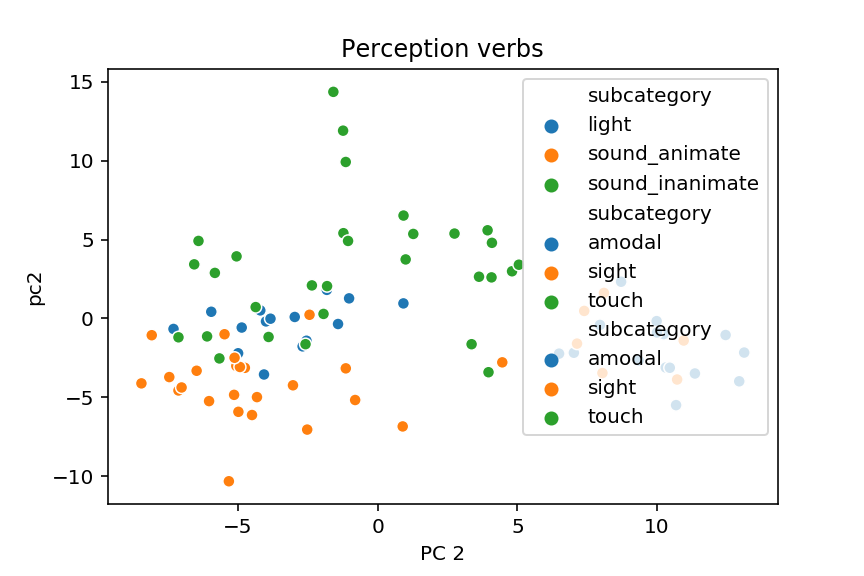

In [7]:
sns.scatterplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="emission"], 
           hue='subcategory')
plt.xlabel("PC 1")
plt.xlabel("PC 2")
plt.title("Emission verbs")
plt.savefig("Figures/bedny_emission_verbs_pca.png", dpi=300)

<IPython.core.display.Javascript object>


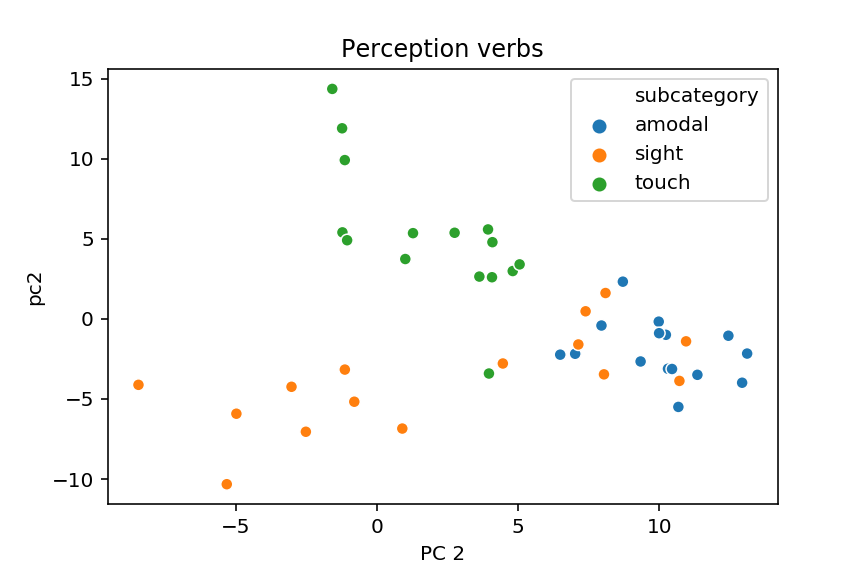

In [10]:
sns.scatterplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="perception"], 
                hue='subcategory')
plt.xlabel("PC 1")
plt.xlabel("PC 2")
plt.title("Perception verbs")
plt.savefig("Figures/bedny_perception_verbs_pca.png", dpi=300)
plt.show()

<IPython.core.display.Javascript object>


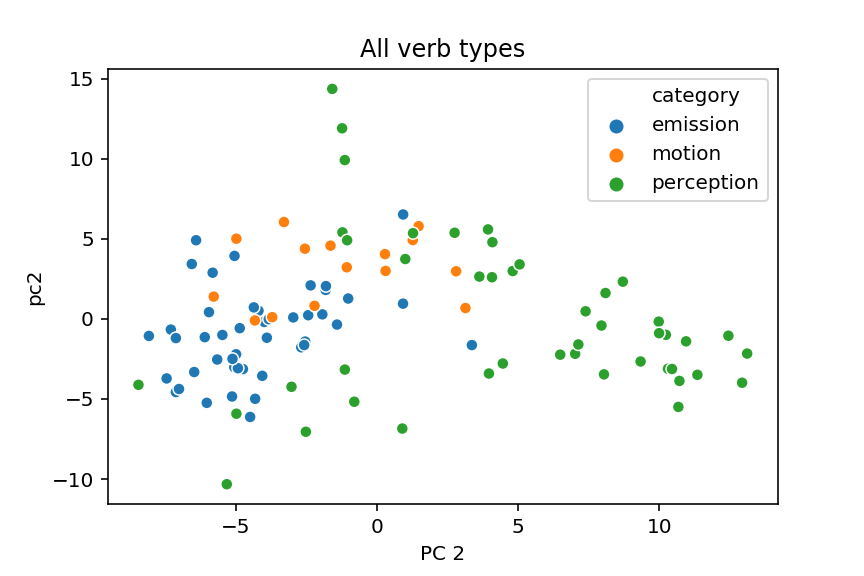

In [13]:
sns.scatterplot(x="pc1", y="pc2", data = df_verbs, 
                hue='category')
plt.xlabel("PC 1")
plt.xlabel("PC 2")
plt.title("All verb types")
plt.savefig("Figures/bedny_all_types_pca.png", dpi=300)
plt.show()

## Hierarchical clustering

### For sight perception

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage  

In [48]:
df_sighted = df_verbs[df_verbs['subcategory']=="sight"]
len(df_sighted)

15

In [49]:
X = df_sighted[['pc1', 'pc2']].values

In [50]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


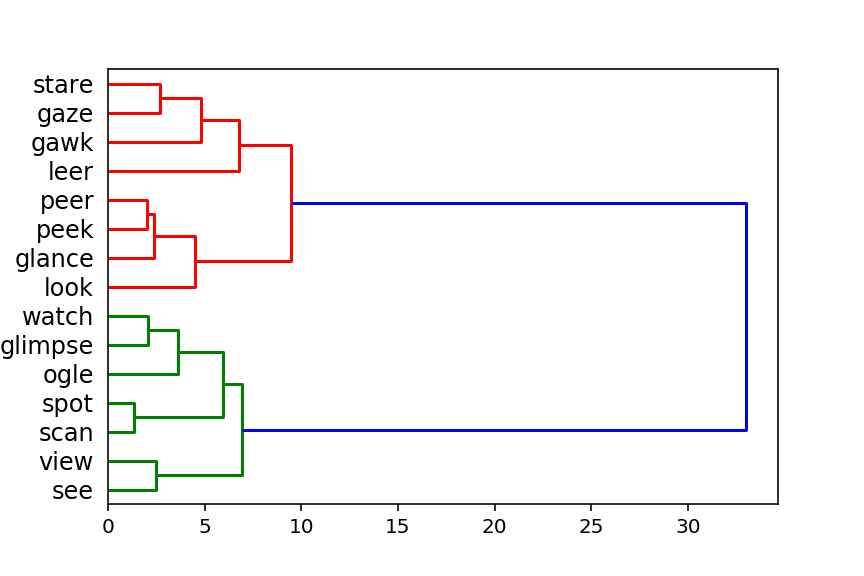

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [25.625, 25.625, 103.75, 103.75]],
 'dcoord': [[0.0, 2.4822516039450244, 2.4822516039450244, 0.0],
  [0.0, 1.3420203504045607, 1.3420203504045607, 0.0],
  [0.0, 2.0755551245297448, 2.0755551245297448, 0.0],
  [0.0, 3.6274788297642004, 3.6274788297642004, 2.0755551245297448],
  [1.3420203504045607,
   5.966115939201499,
   5.966115939201499,
   3.6274788297642004],
  [2.4822516039450244,
   6.914590451540712,
   6.914590451540712,
   5.966115939201499],
  [0.0, 2.034573822981497, 2.034573822981497, 0.0],
  [0.0, 2.3791297620255967, 2.3791297620255967, 2.034573822981497],
  [0.0, 4.513722296072967

In [51]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_sighted['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For light emission

In [32]:
df_verbs[df_verbs['subcategory']=="motion"]

,Unnamed: 0,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,contextualized_embedding,pc1,pc2
45,45,motion,motion,bounce,502,343,442,321,9.84,2.7016,4.09,2.5366,6,"[-0.7991639971733093, -0.8626993894577026, 0.3...","[0.09999746084213257, -0.9976750612258911, 0.2...",-1.651654,4.573733
46,46,motion,motion,float,381,308,357,295,7.47,2.5821,3.67,2.4900,5,"[-0.08201010525226593, -0.6046925783157349, 0....","[0.7091550230979919, 0.43737030029296875, 0.45...",0.300459,2.994875
47,47,motion,motion,glide,120,66,81,57,2.35,2.0828,0.79,1.8261,5,"[0.7237861752510071, -0.663341760635376, 0.655...","[0.9790629148483276, 0.4560486972332001, 0.666...",-2.219332,0.816671
48,48,motion,motion,hobble,18,12,17,11,0.35,1.2788,0.14,1.1139,6,"[-0.21916022896766663, 0.1256343573331833, 0.6...","[-0.4573651850223541, -1.5761222839355469, 0.0...",1.264425,4.921223
49,49,motion,motion,roll,3227,1914,2636,1664,63.27,3.5089,22.82,3.2822,4,"[-0.18526530265808105, -0.7898517847061157, -0...","[0.9759437441825867, 1.3473117351531982, 0.417...",-3.303362,6.048367
50,50,motion,motion,saunter,8,6,6,5,0.16,0.9542,0.07,0.8451,7,"[-0.7845756411552429, -0.605670690536499, -0.1...","[0.28829434514045715, -0.12390512228012085, 0....",-3.719905,0.108215
51,51,motion,motion,scurry,40,28,28,26,0.78,1.6128,0.33,1.4624,6,"[0.5614669322967529, -0.1349143385887146, -0.5...","[0.25334566831588745, -1.0344517230987549, 0.5...",-4.333035,-0.096846
52,52,motion,motion,skip,1076,689,671,568,21.10,3.0322,8.21,2.8388,4,"[-0.12167733907699585, 0.557974636554718, 0.46...","[0.0018500685691833496, 0.5640382766723633, 0....",2.800713,2.973733
53,53,motion,motion,slither,11,11,11,11,0.22,1.0792,0.13,1.0792,7,"[-0.40607088804244995, 0.5563212037086487, 0.7...","[0.7544350624084473, 0.27391308546066284, 0.70...",-4.990371,5.008093
54,54,motion,motion,spin,746,550,631,489,14.63,2.8733,6.56,2.7412,4,"[-0.46942460536956787, 1.0099220275878906, 0.7...","[0.8786691427230835, -0.518333375453949, 0.685...",0.279578,4.045231


In [52]:
df_light = df_verbs[df_verbs['subcategory']=="light"]
len(df_sighted)

15

In [53]:
X = df_light[['pc1', 'pc2']].values

In [54]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


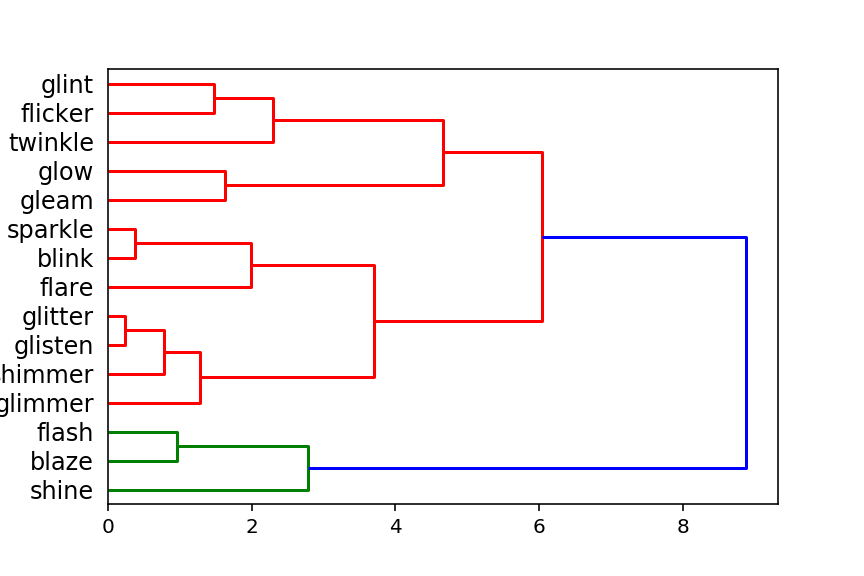

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [43.75, 43.75, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [63.125, 63.125, 121.25, 121.25],
  [12.5, 12.5, 92.1875, 92.1875]],
 'dcoord': [[0.0, 0.9623289791301399, 0.9623289791301399, 0.0],
  [0.0, 2.7907917587001996, 2.7907917587001996, 0.9623289791301399],
  [0.0, 0.23513988253061283, 0.23513988253061283, 0.0],
  [0.0, 0.7811346784069855, 0.7811346784069855, 0.23513988253061283],
  [0.0, 1.27831482706978, 1.27831482706978, 0.7811346784069855],
  [0.0, 0.38240292293860406, 0.38240292293860406, 0.0],
  [0.0, 1.9900541545208172, 1.9900541545208172, 0.38240292293860406],
  [1.27831482706978, 3.698037976967485, 3.698037976967485, 1.9900541545208172],
  [0.0, 1.6337377279581018, 1.6337377

In [55]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_light['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For touch

In [56]:
df_touch = df_verbs[df_verbs['subcategory']=="touch"]
len(df_sighted)

15

In [57]:
X = df_touch[['pc1', 'pc2']].values

In [58]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


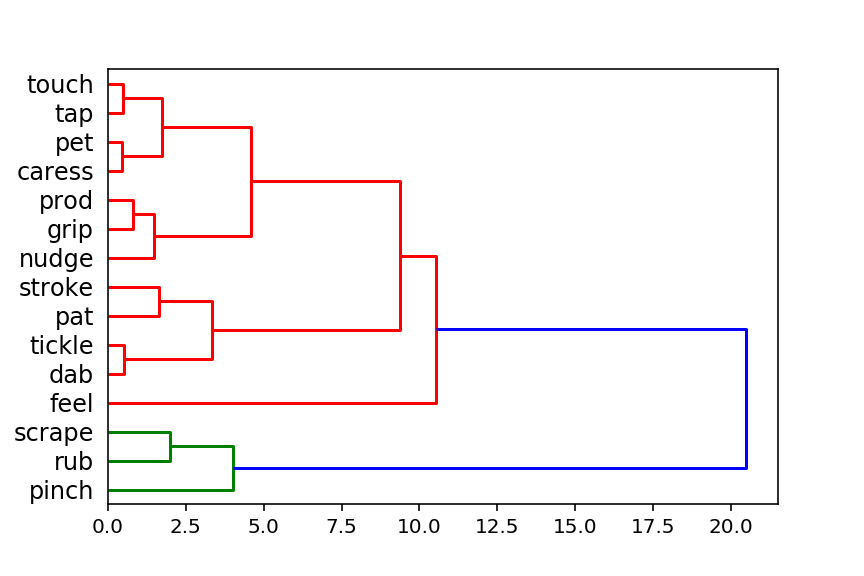

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [92.5, 92.5, 130.0, 130.0],
  [60.0, 60.0, 111.25, 111.25],
  [35.0, 35.0, 85.625, 85.625],
  [12.5, 12.5, 60.3125, 60.3125]],
 'dcoord': [[0.0, 1.9871304094688071, 1.9871304094688071, 0.0],
  [0.0, 4.011585808608029, 4.011585808608029, 1.9871304094688071],
  [0.0, 0.5191900247492931, 0.5191900247492931, 0.0],
  [0.0, 1.6382878894995143, 1.6382878894995143, 0.0],
  [0.5191900247492931,
   3.3416355188593707,
   3.3416355188593707,
   1.6382878894995143],
  [0.0, 0.8110135361538483, 0.8110135361538483, 0.0],
  [0.0, 1.474280191370408, 1.474280191370408, 0.8110135361538483],
  [0.0, 0.44967977355950056, 0.44967977355950056, 0.0],
  [0.0, 0.48242156139945425, 0.48242156139945425, 0.0],
  

In [59]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_touch['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For motion

In [61]:
df_motion = df_verbs[df_verbs['subcategory']=="motion"]

In [62]:
X = df_motion[['pc1', 'pc2']].values

In [63]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


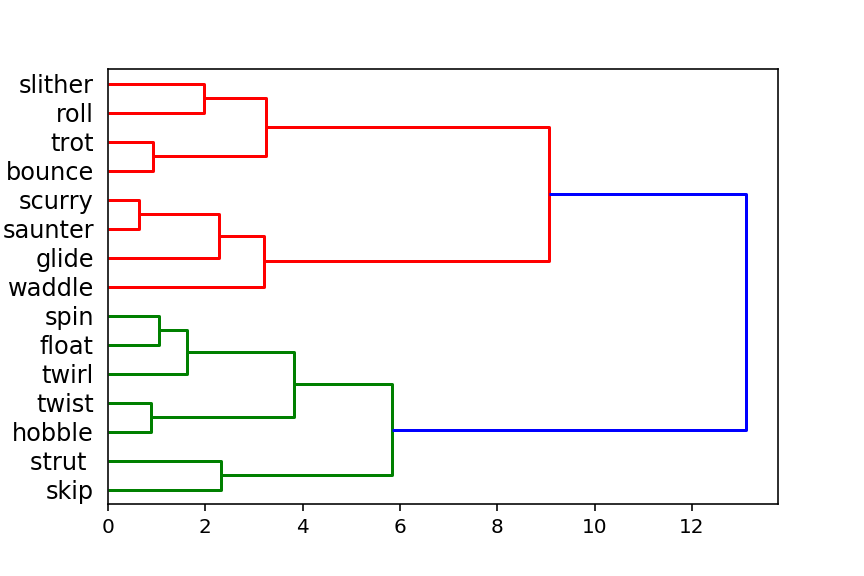

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [83.75, 83.75, 130.0, 130.0],
  [25.625, 25.625, 106.875, 106.875]],
 'dcoord': [[0.0, 2.3206218561641125, 2.3206218561641125, 0.0],
  [0.0, 0.891990650418638, 0.891990650418638, 0.0],
  [0.0, 1.0505636084406635, 1.0505636084406635, 0.0],
  [0.0, 1.6138411298722477, 1.6138411298722477, 1.0505636084406635],
  [0.891990650418638,
   3.8237345504305758,
   3.8237345504305758,
   1.6138411298722477],
  [2.3206218561641125,
   5.844793278135183,
   5.844793278135183,
   3.8237345504305758],
  [0.0, 0.6465124331381368, 0.6465124331381368, 0.0],
  [0.0, 2.2871957922068584, 2.2871957922068584, 0.6465124331381368],
  [0.0, 3.209360756524

In [64]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_motion['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### save to file

In [65]:
df_verbs.to_csv("data/processed/verbs_with_embeddings.csv")

## Get all similarities

In [4]:
df_verbs = pd.read_csv("data/processed/verbs_with_embeddings.csv")

In [15]:
import itertools
import scipy
import ast

In [32]:
similarities = []
for w1, w2 in tqdm(list(itertools.combinations(list(df_verbs['verb']), 2))):

    w1_embedding = ast.literal_eval(df_verbs[df_verbs['verb']==w1]['contextualized_embedding'].iloc[0])
    w2_embedding = ast.literal_eval(df_verbs[df_verbs['verb']==w2]['contextualized_embedding'].iloc[0])
    
    sim = scipy.spatial.distance.cosine(w1_embedding, w2_embedding)
    
    similarities.append({
        'w1': w1,
        'w2': w2,
        'cosine_distance': sim
    })

100%|██████████| 5460/5460 [02:57<00:00, 30.26it/s]  


In [21]:
import ast

In [33]:
df_similarities = pd.DataFrame(similarities)

In [35]:
df_similarities.to_csv("data/processed/verb_embedding_distances.csv")